<a href="https://colab.research.google.com/github/lopezns/MachineLearning/blob/main/EjercicioRegresi%C3%B3nLog%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Age         Income  Clicks  Purchases
0        2295   19   61770.217668      96          5
1        2385   66   72535.876847       1          0
2        1942   67   31468.931781      34          9
3        4280   48  119171.422879       9          2
4        2033   54   50246.782698      63          8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  2000 non-null   int64  
 1   Age         2000 non-null   int64  
 2   Income      2000 non-null   float64
 3   Clicks      2000 non-null   int64  
 4   Purchases   2000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 78.2 KB
None
        CustomerID          Age         Income       Clicks    Purchases
count  2000.000000  2000.000000    2000.000000  2000.000000  2000.000000
mean   5529.738500    43.148500   70022.511826    50.014500     4.451500
std    2576.54

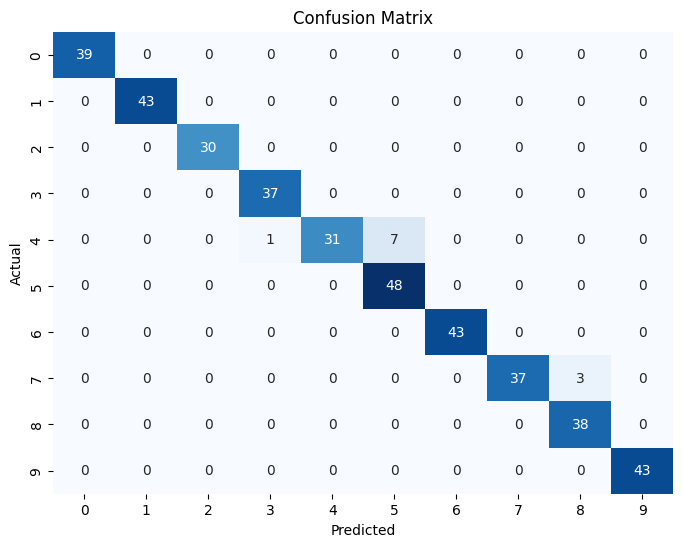

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

data = pd.read_csv('marketing_data.csv')

print(data.head())
print(data.info())
print(data.describe())

X = data[['Age', 'Income', 'Clicks', 'Purchases']]
y = data['Purchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression()

logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        30
           3       0.97      1.00      0.99        37
           4       1.00      0.79      0.89        39
           5       0.87      1.00      0.93        48
           6       1.00      1.00      1.00        43
           7       1.00      0.93      0.96        40
           8       0.93      1.00      0.96        38
           9       1.00      1.00      1.00        43

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy * 100:.2f}%')

Exactitud del modelo: 97.25%
